<a href="https://colab.research.google.com/github/Pukar33/CBEAS-Project/blob/main/Week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Part 1-Basics of an Image***

## **Introduction**

This part introduces you to basics of an image. Before you proceed, its best to be quite familiar with Numpy and Matplotlib and with the concept of 2D and 3D arrays. You can always check out these resources online or with ChatGPT.

In [ ]:
# All the imports needed
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive/')
import cv2 as cv
from google.colab.patches import cv2_imshow as cv_imshow
import nibabel as nib
from glob import glob
import pandas as pd
from scipy.ndimage import rotate
import os

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## **Task 1**

**Create a random grey scale image of size 10 by 10. Also add a colorbar along with image for image interpretation.**

*Hint*==> Use numpy and matplotlib along with OpenCV

*Goal of this task*==> To make you familiar with an image data. I expect you to answer about the representation of the image in pixel format.

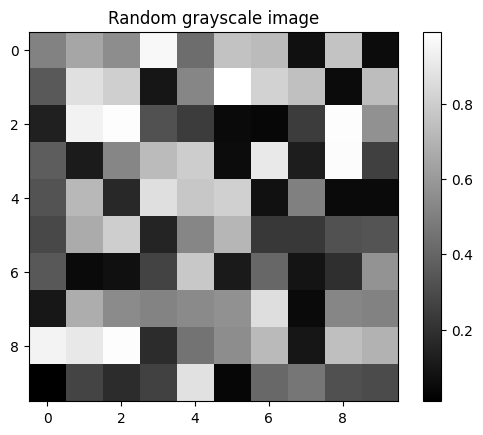

In [ ]:
img_1 = np.random.rand(10,10)
plt.imshow(img_1,cmap = 'gray')
plt.colorbar()
plt.title("Random grayscale image")
plt.show()

## **Task 2**

**Create a random RGB image of size 10 by 10. Illustrate the difference between RGB image and grey scale image.**

Hint==> Use numpy and matplotlib along with OpenCV

Goal of this task==> To make you familiar with an image data. I expect you to answer about the representation of the image in pixel format.



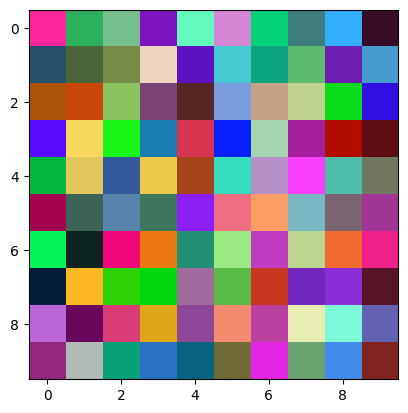

In [ ]:
img_2 = np.random.rand(10,10,3)
plt.imshow(img_2)

# ***Part 2-JPG Image***


## **Introduction**

This part introduces you to analysis of JPG image using OpenCV library. Try to find the BraTS dataset provided in the google drive.

## **Task 1**

**Load any one of the JPG image in BraTS dataset provided in the google drive using OpenCV library.**
*Hint*==> Online resources and ChatGPT
*Objective*==> To make you familiar OpenCV and JPG image


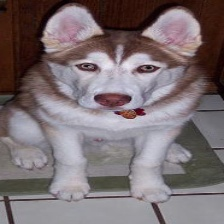

In [ ]:
img_3 = cv.imread('/content/drive/MyDrive/Datasets/DogBreeds/27.jpg')
cv_imshow(img_3)

## **Task 2**

**For the JPG image loaded before try to determine maximum and minimum intensity of the image, the nature of the image(RGB/Grey scale),shape of the image, either (2D/3D), and image resolution and other suitable relevant details.**

*Objective*==> To make you familiar with JPG image details

In [ ]:
max_intensity = np.max(img_3)
min_intensity = np.min(img_3)
print("Maximum Intensity:", max_intensity)
print("Minimum Intensity:", min_intensity)

if len(img_3.shape) == 2:
  print("Grayscale image")
elif len(img_3.shape) == 3 and np.all(img_3[:,:,0] == img_3[:,:,1]) and np.all(img_3[:,:,0] == img_3[:,:,2]) :
  print("Grayscale image")
else:
  print("RGB image")

print("Image shape:", img_3.shape)
print("Image resolution:",img_3.shape[0]*img_3.shape[1])

Maximum Intensity: 245
Minimum Intensity: 0
RGB image
Image shape: (224, 224, 3)
Image resolution: 50176


# ***Part 3-NIFTI Image***


## **Task 1**

**Load any one of the NIFTI image in OASIS image dataset provided in the google drive using Nibabel library.**
*Hint*==> Online resources and ChatGPT
*Objective*==> To make you familiar Nibabel and Nifti image**

(176, 256, 256)


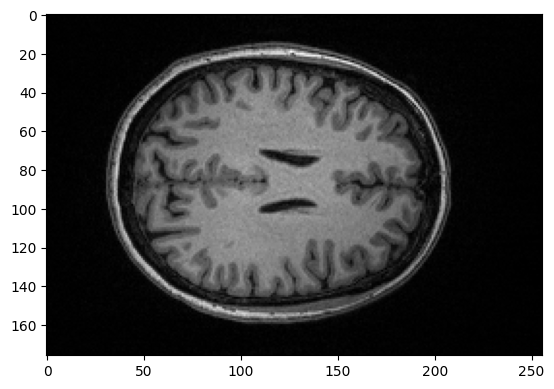

In [ ]:
img_4 = nib.load('/content/drive/MyDrive/Datasets/OASIS3_DataSet_Part1/OASIS3/OAS30001/OAS30001_MR_d0757/anat2/NIFTI/sub-OAS30001_ses-d0757_run-01_T1w.nii.gz')
print(img_4.shape)
img_4_orien = img_4
img_4 = img_4.get_fdata()
plt.imshow(img_4[:,:,150],cmap='gray')

## **Task 2**

**For the Nifti image loaded before try to determine the maximum/minimum intensity of the image, the nature of the image(RGB/Grey scale),shape of the image, either (2D/3D), image resolution, orientation(RAS/LPI or any others) and  other suitable relevant details.**

*Objective*==> To make you familiar with Nifti image details

In [ ]:
max_intensity = np.max(img_4)
min_intensity = np.min(img_4)
print("Maximum Intensity:", max_intensity)
print("Minimum Intensity:", min_intensity)

if len(img_4.shape) == 2:
  print("Grayscale image")
elif len(img_4.shape) == 3 and np.all(img_4[:,:,0] == img_4[:,:,1]) and np.all(img_4[:,:,0] == img_4[:,:,2]) :
  print("Grayscale image")
else:
  print("RGB image")

print("Image shape:", img_4.shape)
print("Image resolution:",img_4.shape[0]*img_4.shape[1])

print("Image Orientation: ", nib.aff2axcodes(img_4_orien.affine))

Maximum Intensity: 819.0
Minimum Intensity: 0.0
RGB image
Image shape: (176, 256, 256)
Image resolution: 45056
Image Orientation:  ('R', 'A', 'S')


## **Task 3**

**Load any one of the NIFTI image in OASIS label dataset provided in the google drive using Nibabel library and determine it's maximum and minimum value. What do the values represent in NIFTI label file?**

*What's the difference between NIFTI  image and NIFTI label file?*

In [ ]:
img = img_4
print(img.shape)
print(np.max(img),np.min(img))

(176, 256, 256)
819.0 0.0


In [ ]:
label = nib.load('/content/drive/MyDrive/Datasets/OASIS Dataset/Label Folder/OAS30001_MR_d0757.nii.gz').get_fdata()
print("Shape: ",label.shape)
print(f"Max label: {np.max(label)} \nMin label: {np.min(label)}")
print(f"Unique labels: {np.unique(label)}")
print(f"Lenght of unique labels: {len(np.unique(label))}")


Shape:  (256, 256, 256)
Max label: 255.0 
Min label: 0.0
Unique labels: [  0.   2.   3.   4.   5.   7.   8.  10.  11.  12.  13.  14.  15.  16.
  17.  18.  24.  26.  28.  30.  31.  41.  42.  43.  44.  46.  47.  49.
  50.  51.  52.  53.  54.  58.  60.  62.  63.  77.  80.  85. 251. 252.
 253. 254. 255.]
Lenght of unique labels: 45


# ***Part 4- Basics of Image Processing***

## **Introduction**

This section introduces you to basics of image processing. Image processing refers to alteration of image features like intensities, orientation, rotation, flipping etc. OpenCV library is extensively used for processing of both jpg and nifti images. Please consult OpenCV library through online or via ChatGPT.

## **Task 1: Processing of single JPG or NIFTI Image**

**For any single JPG image and NIFTI image, perform processing like intensity normalization, resizing, rotation and flipping of the image.**

*Note:*==> OpenCV library can be used for processing for both types of images. However, you may need Nibabel library to load NIFTI images.







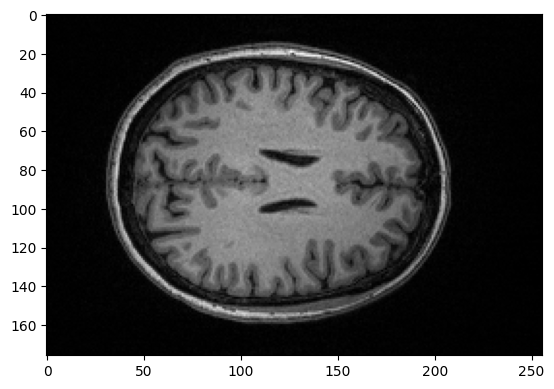

In [ ]:
# Showing unprocessed image
img_slice = img_4[:,:,150]
plt.imshow(img_slice,cmap = 'gray')

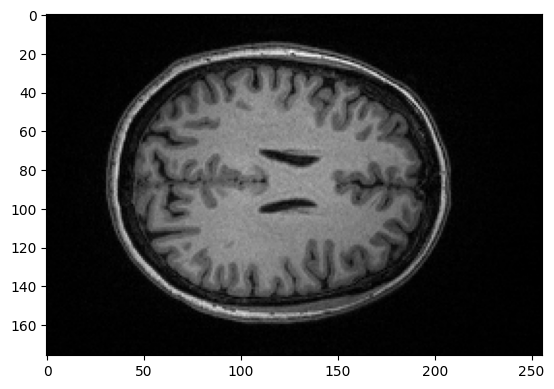

In [ ]:
# Intensity normalization
nor_img = cv.normalize(img_slice,None,alpha=0,beta=255,norm_type=cv.NORM_MINMAX,dtype=cv.CV_8U)
plt.imshow(nor_img,cmap='gray')

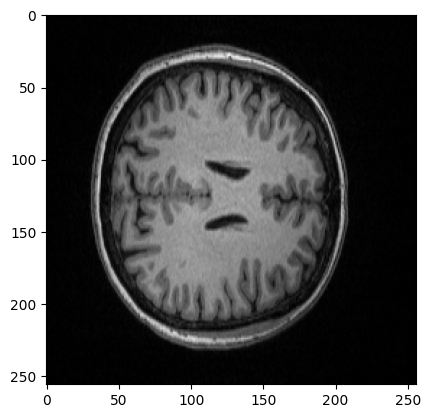

In [ ]:
#Resizing
resized_img = cv.resize(nor_img,(256,256))
plt.imshow(resized_img,cmap='gray')

In [ ]:
print(img_slice.shape)

(176, 256)


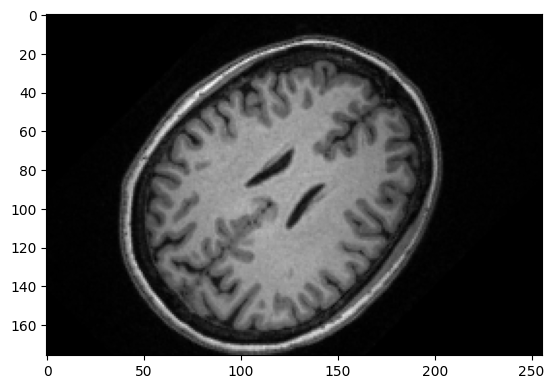

In [ ]:
#Rotation
height = img_slice.shape[0]
width = img_slice.shape[1]
center = (width/2,height/2)
angle = 45
scale = 1
rot_matrix = cv.getRotationMatrix2D(center,angle,scale)
rot_img = cv.warpAffine(img_slice,rot_matrix,(width,height))
plt.imshow(rot_img,cmap='gray')

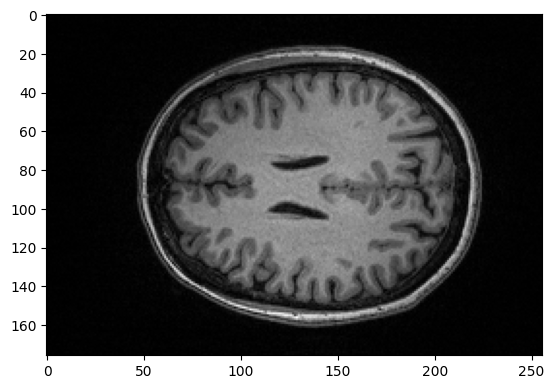

In [ ]:
# Flipping
flip_img = cv.flip(img_slice,-1)
# 0 for vertical and 1 for vertical and -1 for both horizontal and vertical
plt.imshow(flip_img,cmap='gray')

## **Task 2: Processing of all JPG and NIFTI images in dataset as a whole**

**For all JPG images and NIFTI images in the dataset, perform processing like intensity normalization, resizing, rotation and flipping of the image.**

*Note:*==> It would be meaningful to first create a .csv file or even pandas dataframe with different types of image features like maximum/minimum intensity, orientation, size of the image, resolution of the image before performing any kind of processing for both types of images. **Note down any inconsistencies in images features in the whole dataset.**

*Hint*==> You probably need to use for loops to process all the images in the dataset.

*What difference can you observe regarding the complexity of processing of JPG and NIFTI images?*








In [ ]:
# Loading all the images in the directory
img_directory = '/content/drive/MyDrive/Datasets/OASIS Dataset/Image Folder/*'

In [ ]:
# Creating pandas dataframe with different types of image feature
Loc_Image_Files = sorted(glob(img_directory,recursive=True))
Image_info = []
for files in Loc_Image_Files:
  y = nib.load(files)
  x = y.get_fdata()
  Image_info.append({'Image Path':files,
                  'Minimun Intensity':x.min(),
                  'Maximum Intensity':x.max(),
                  'Orientation':nib.aff2axcodes(y.affine),
                  'Image Shape':x.shape,
                  'Image Resolution':y.header.get_zooms(),
                  })
df = pd.DataFrame(Image_info)
df

,Image Path,Minimun Intensity,Maximum Intensity,Orientation,Image Shape,Image Resolution
0,/content/drive/MyDrive/Datasets/OASIS Dataset/...,0.0,819.0,"(R, A, S)","(176, 256, 256)","(0.9999988, 1.0, 1.0)"
1,/content/drive/MyDrive/Datasets/OASIS Dataset/...,0.0,1305.0,"(R, A, S)","(176, 240, 256)","(1.1999978, 1.0546874, 1.0546875)"
2,/content/drive/MyDrive/Datasets/OASIS Dataset/...,0.0,724.0,"(R, A, S)","(176, 256, 256)","(0.9999997, 1.0, 1.0)"
3,/content/drive/MyDrive/Datasets/OASIS Dataset/...,0.0,2566.0,"(R, A, S)","(176, 240, 256)","(1.2000046, 1.0546875, 1.0546874)"
4,/content/drive/MyDrive/Datasets/OASIS Dataset/...,0.0,1532.0,"(R, A, S)","(176, 240, 256)","(1.2000046, 1.0546875, 1.0546875)"
5,/content/drive/MyDrive/Datasets/OASIS Dataset/...,0.0,990.0,"(R, A, S)","(176, 256, 256)","(1.0000027, 0.99999994, 1.0)"
6,/content/drive/MyDrive/Datasets/OASIS Dataset/...,0.0,922.0,"(R, A, S)","(176, 256, 256)","(0.99999845, 1.0, 1.0)"
7,/content/drive/MyDrive/Datasets/OASIS Dataset/...,0.0,1353.0,"(R, A, S)","(176, 240, 256)","(1.2000046, 1.0546875, 1.0546875)"
8,/content/drive/MyDrive/Datasets/OASIS Dataset/...,0.0,773.0,"(R, A, S)","(176, 256, 256)","(1.0000005, 1.0, 1.0)"
9,/content/drive/MyDrive/Datasets/OASIS Dataset/...,0.0,3456.0,"(R, A, S)","(176, 240, 256)","(1.2000046, 1.0546875, 1.0546875)"


In [ ]:
#Creating a function to perform all the preprocessing tasks
def image_processing(image_path,i):
  img = nib.load(df['Image Path'][i]).get_fdata()
  normalized_image = normalize_image(img)
  resized_img = cv.resize(normalized_image,(256,256))
  rotated_img = rotate(resized_img,angle=45,axes=(0,1),reshape=False) # Rotate by 45 degreee about z axis
  flipped_img = np.flip(rotated_img,axis=1) # Flip along y-axis (coronal plane)
  return flipped_img

In [ ]:
#To preprocess and save the data in drive
for i in range(len(df)):
  original_image = nib.load(df['Image Path'][i])
  processed_image = image_processing(df['Image Path'][i],i)
  convert_to_nifti = nib.Nifti1Image(processed_image,original_image.affine)
  output_name = f"processed_image_{i+1}_.nii.gz"
  output_path = os.path.join('/content/drive/MyDrive/Preprocessing/OASIS Dataset/Image Folder',output_name)
  nib.save(convert_to_nifti,output_path)

# ***Image Visualization and  Analysis using Industry Standard Tools***


## **Introduction**

Following softwares are to be installed for image visualization and analysis:



1.   ITK Snap-Very easy to install and use (**Should be installled by all members of the group**)
2.   FreeSurfer-Atlas based method for brain images segmentation and visualization tool==> *Easy and convenient tool for image visualization* (** Atleast 3 members are required to install it)
3. FSL-Will be later used for segmentation tasks, not needed for now. However, all members of the group are encouraged to try to make an attempt for installation as there was problem last time during installation.




## **Visualization**

*Try to visualize JPG and NIFTI(both image and label files) and try to note down important image features from the software both(FreeSurfer and ITK-Snap).Also try to note down the differences between these two softwares. For NIFTI images, try to note down the difference between image and label files as well.*
